In [1]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np
import math
from operator import itemgetter
from scipy import interpolate
from ctypes import *
from scipy import ndimage
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw, ImageFilter
import cv2 
from scipy.ndimage.filters import generic_filter

# Выделение границ объектов на бинарном изображении

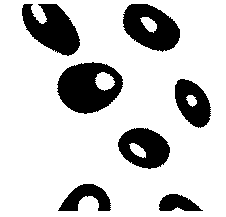

In [2]:
image_binary = Image.open("images/лейкоциты_бинарное.jpg").convert("1")
image_binary

In [3]:
def row_scanning(binary_image, j, w, result):
    inside=False    #
    for i in range(w):
        if not inside and binary_image.getpixel((i,j)):  #если указатель не внутри изображения и он на точке белого цвета(то есть вне внутренности), то мы закрашиваем его чёрным(чтобы выделить лишь контур)
            result.point([i,j],fill=(255,255,255))
            inside=True
        if inside and not binary_image.getpixel((i,j)):  #если указатель внутри изображения(или границе) и пиксель чёрный, то мы его оставляем и закрашиваем левее, тем самым оставляя контур, и меняем значение флага
            result.point([i-1,j],fill=(255,255,255))
            inside=False

In [4]:
def take_binary_bounders(binary_image):
    w = binary_image.width #длина изображения
    h = binary_image.height #высота изображения 
    result =Image.new(mode="RGB",size=(w,h)) #создаем итоговое изображение
    draw=ImageDraw.Draw(result)
    for j in range(h):
        row_scanning(binary_image, j, w, draw)  #идём вдоль высоты и сканируем по строкам
    return result

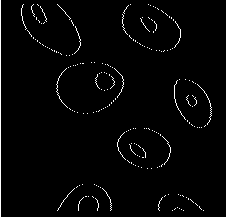

In [5]:
res_binary_img = take_binary_bounders(image_binary)
res_binary_img.save('images/Выделение границ объектов на бинарном изображении.jpg', "JPEG")
res_binary_img

# Выделение границ объектов на полутоновом изображении

с помощью оператора Собеля

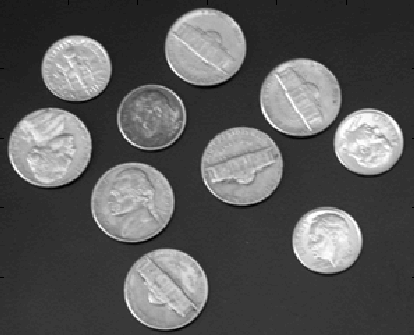

In [6]:
image_halftone = Image.open("images/coins.png")
image_halftone

In [7]:
#Оператор вычисляет градиент яркости изображения в каждой точке. 
#Так находится направление наибольшего увеличения яркости и величина её изменения в этом направлении. 
#Результат показывает, насколько «резко» или «плавно» меняется яркость изображения в каждой точке, 
#а значит, вероятность нахождения точки на грани, а также ориентацию границы. 
#Строго говоря, оператор использует ядра {\displaystyle 3\times 3}3 \times 3,
#с которыми сворачивают исходное изображение для вычисления приближённых значений производных по горизонтали и по вертикали.

def operator_Sobel(p):  #оператор Собеля
    return (np.abs((p[0] + 2 * p[1] + p[2]) - (p[6] + 2 * p[7] + p[8])) +
            np.abs((p[2] + 2 * p[6] + p[7]) - (p[0] + 2 * p[3] + p[6])))  #дифференциальный оператор, вычисляющий приближённое значение градиента яркости изображения

In [8]:
def take_halftone_bounders(image_halftone):
    converted = np.asarray(image_halftone.convert("I")) #конвертируем изображение (в матрицу записываются первые значения пикселя, пробегая каждую строку)
    boundaries_array = generic_filter(converted, operator_Sobel, (3, 3)) #вызывает функцию один раз для каждого подмассива (3*3)
    return Image.fromarray(boundaries_array).convert("RGB")

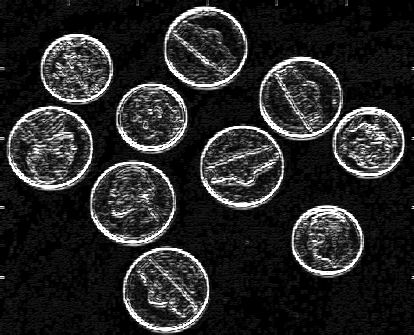

In [9]:
res_halftone_img = take_halftone_bounders(image_halftone)
res_halftone_img.save('images/Выделение границ объектов на полутоновом изображении.jpg', "JPEG")
res_halftone_img